In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things

In [2]:
# Importing the dataset
import pandas as pd
dataset = pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")

# Data Analysis

In [3]:
# Displaying first 5 row from our dataset
dataset.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Displaying the shape of the dataset and datatype of each attribute
print(dataset.shape)
dataset.dtypes

(119390, 32)


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
# Describe the dataset
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Output attribute is_canceled falls in between 0 to 1 interval

# Data Checking Null or Empty values

In [6]:
# Checking the total values cell there in each attribute and empty or null cells negelted.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

We are not sure how many missing values there in each attribute.....using isna() function

So will find missing or error or empty cell and we will get exact count we use sum() function

dataset.isna().sum()

In [7]:
# Getting count sum of missing values in each attribute.
dataset.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Removing the more missing values Because it cross the threshold value.

1. We are going to remove the company column because it cross the threshold value
2. We are going to remove the country missing rows only because we cant replace with mean,median or mode well it is because it is a categorical value.
3. We are going to apply Imputer library to replace those empty or null values into mean and median for that row. 

# Data Cleaning

In [8]:
# Removing the company attribute because it is having more missing values
dataset=dataset.drop(['company'],axis=1)

# Checking again null count to know company attribute dropped.
dataset.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [9]:
# Now we are going to remove those missing rows in all attributes.
dataset=dataset.dropna(axis=0)

# Checking those values empty values removed remaining row should match with the country rows.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
hotel                             102894 non-null object
is_canceled                       102894 non-null int64
lead_time                         102894 non-null int64
arrival_date_year                 102894 non-null int64
arrival_date_month                102894 non-null object
arrival_date_week_number          102894 non-null int64
arrival_date_day_of_month         102894 non-null int64
stays_in_weekend_nights           102894 non-null int64
stays_in_week_nights              102894 non-null int64
adults                            102894 non-null int64
children                          102894 non-null float64
babies                            102894 non-null int64
meal                              102894 non-null object
country                           102894 non-null object
market_segment                    102894 non-null object
distribution_channel              102894 n

In [10]:
dataset.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

All missing valued handled.Now we are going to apply label encode

# Label Encoder

Encoding the categorical values into numerical values.
I am going to handle label encode in 2 ways 
1. Using unique function and map function to modify those values
2. Using LabelEncode library.

# 1. Using unique function and map function to modify categorical to numerical values

Lets now check the unique values in each column

In [11]:
# Hotel attribute encoding from categorical to numerical.
dataset['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [12]:
# Mapping those values to our dataset
dataset['hotel']=dataset['hotel'].map({'Resort Hotel':0,'City Hotel':1})
dataset['hotel'].unique()

array([0, 1])

In [13]:
# Encoding arrival_date_month from categorical to numerical
dataset['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [14]:
# Now mapping those value 
dataset['arrival_date_month']=dataset['arrival_date_month'].map({'July':7,'August':8,'September':9,'October':10
                                                                ,'November':11,'December':12,'January':1,'February':2,'March':3,
                                                                'April':4,'May':5,'June':6})
dataset['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

# 2. Using LabelEncode library

In [15]:

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [16]:
# Here applying label encoder to categorical attribute by using column key name.
dataset['meal']=labelencoder.fit_transform(dataset['meal'])
dataset['meal'].unique()

array([0, 1, 2, 3, 4])

In [17]:
dataset['country']=labelencoder.fit_transform(dataset['country'])
dataset['market_segment']=labelencoder.fit_transform(dataset['market_segment'])
dataset['distribution_channel']=labelencoder.fit_transform(dataset['distribution_channel'])
dataset['reserved_room_type']=labelencoder.fit_transform(dataset['reserved_room_type'])
dataset['assigned_room_type']=labelencoder.fit_transform(dataset['assigned_room_type'])
dataset['deposit_type']=labelencoder.fit_transform(dataset['deposit_type'])
dataset['customer_type']=labelencoder.fit_transform(dataset['customer_type'])
dataset['reservation_status']=labelencoder.fit_transform(dataset['reservation_status'])
dataset['reservation_status_date']=labelencoder.fit_transform(dataset['reservation_status_date'])

In [18]:
# Displaying first 5 row in our dataset
dataset.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,0,0,13,2015,7,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,119
4,0,0,14,2015,7,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,120
5,0,0,14,2015,7,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,120
7,0,0,9,2015,7,27,1,0,2,2,...,0,0,303.0,0,2,103.0,0,1,1,120
8,0,1,85,2015,7,27,1,0,3,2,...,0,0,240.0,0,2,82.0,0,1,0,70


# Feature Extraction

Because we have lot of attributes and not all attributes related and best pattern match with ouput attribute.

So now we are extracting the correlation values with output attribute and those attribute gives max corrlation we are going to use those attributes and remaining attributes are neglected.

As we are know the concept of Dimensionalty reduction which have 2 main algorithms

1. Principal Component Analysis (PCA)
2. Linear Descriminant Analysis (LDA)

Those 2 algorithms automatically take top correlated values we just need to mention how many attributes required k=5 or 10 or  12 like way......


In [19]:
# Gathering which feature is more important.....using corr() funtion
correlation=dataset.corr()['is_canceled']
correlation.abs().sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.921747
deposit_type                      0.459075
country                           0.296281
lead_time                         0.277666
total_of_special_requests         0.257934
required_car_parking_spaces       0.188298
reservation_status_date           0.180957
assigned_room_type                0.165903
booking_changes                   0.131714
previous_cancellations            0.117983
hotel                             0.116237
distribution_channel              0.097841
agent                             0.081939
reserved_room_type                0.061794
customer_type                     0.060653
days_in_waiting_list              0.052475
previous_bookings_not_canceled    0.042589
market_segment                    0.038758
adults                            0.037057
babies                            0.032038
meal                              0.030191
is_repeated_guest                 0.029913
stays_in_we

We are going to select upto meal column and remaining columns are neglected....



In [20]:
cols=['is_repeated_guest','stays_in_weekend_nights','adr','arrival_date_month','arrival_date_day_of_month','children',
     'arrival_date_year','arrival_date_week_number','stays_in_week_nights','reservation_status']
dataset=dataset.drop(cols,axis=1)
dataset.head(5)

,hotel,is_canceled,lead_time,adults,babies,meal,country,market_segment,distribution_channel,previous_cancellations,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status_date
3,0,0,13,1,0,0,59,2,0,0,...,0,0,0,0,304.0,0,2,0,0,119
4,0,0,14,2,0,0,59,6,3,0,...,0,0,0,0,240.0,0,2,0,1,120
5,0,0,14,2,0,0,59,6,3,0,...,0,0,0,0,240.0,0,2,0,1,120
7,0,0,9,2,0,1,134,3,1,0,...,2,2,0,0,303.0,0,2,0,1,120
8,0,1,85,2,0,0,134,6,3,0,...,0,0,0,0,240.0,0,2,0,1,70


In [21]:
print(dataset.shape)

(102894, 21)


# Analyzing the Dataset using Heatmap

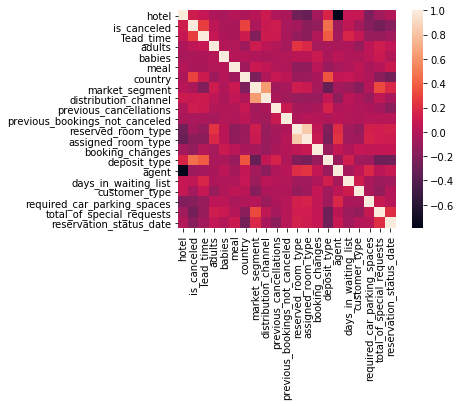

In [22]:
# heatmap
import seaborn as sb

data_corr=dataset.corr()
sb.heatmap(data_corr,square=True)

# Splitting dataset into input and ouput attribute

In [23]:
y=dataset['is_canceled'].values
x=dataset.drop(['is_canceled'],axis=1).values

We can't analysis all input attribute with ouput attribute histogram plot. Because we have lot of attributes.
we can visualise though Tabule Tool to analysis the data if we have more attributes.

# Splitting dataset into training and test split

In [24]:
# dataset split.
train_size=0.80
test_size=0.20
seed=5

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

# Modeling

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogisticRegression : 0.756946 (0.005135)
knn : 0.833736 (0.004422)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC : 0.733682 (0.003884)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


decision_tree : 0.871676 (0.004823)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Naive Bayes : 0.591824 (0.010506)


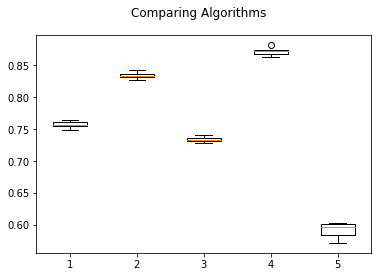

In [25]:
# Spotcheck and compare algorithms with out applying feature scale.......

n_neighbors=5
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# keeping all models in one list
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='accuracy'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

As per the above accuracy results.

LogisticRegression : 0.756946 (0.005135)

knn : 0.833736 (0.004422)

SVC : 0.733682 (0.003884)

decision_tree : 0.872065 (0.004405)

Naive Bayes : 0.591824 (0.010506)

Next we are going to perform same technique but we are applying feature scaling.....

We are going to do tuning top 2 algorithms which will be given below because we are applying feature scaling....

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogisticRegression : 0.756946 (0.005135)
knn : 0.833736 (0.004422)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC : 0.733682 (0.003884)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


decision_tree : 0.871615 (0.004700)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Naive Bayes : 0.591824 (0.010506)


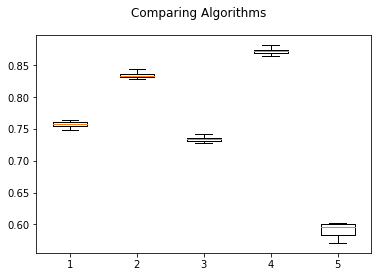

In [26]:
# Spot Checking and Comparing Algorithms With StandardScaler Scaler
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
pipelines=[]
pipelines.append(('scaled Logisitic Regression',Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVC',Pipeline([('scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeClassifier())])))
pipelines.append(('scaled naive bayes',Pipeline([('scaler',StandardScaler()),('scaled Naive Bayes',GaussianNB())])))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()


As per the above accuracy results.

LogisticRegression : 0.756946 (0.005135)

knn : 0.833736 (0.004422)

SVC : 0.733682 (0.003884)

decision_tree : 0.871542 (0.005300)

Naive Bayes : 0.591824 (0.010506)


We are going to do tuning Decision Tree and KNN algorithms.

In [27]:
# Regualarisation Tuning for KNN Algorithm
# We are not going to use any hyper parameter because we dont have much attributes in it...
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_neighbors=[3,5,7,9,12]
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.850234 using {'n_neighbors': 3} 


In [28]:
# Regualarisation Tuning for DecisionTree Algorithm
# DecisionTree Algorithm Tuning
# We are not going to use any hyper parameter because we dont have much attributes in it...

import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict()
model=DecisionTreeClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.871785 using {} 


We got following accuracy after applying the parameter regularisation tuning.

1. Decision Tree Classifier Best: 0.871603 using {} 
2. K Nearest Neighbors Classifier Best: 0.850234 using {'n_neighbors': 3} 



Now we are boosting the performance by using ensemble algorithms.

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledAB : 0.832679 (0.004196)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledGBC : 0.853757 (0.005125)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledRFC : 0.894430 (0.004009)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


scaledETC : 0.887833 (0.003193)


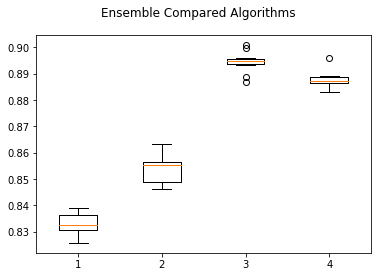

In [29]:
# Ensemble and Boosting algorithm to improve performance

#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Bagging methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',StandardScaler()),('AB',AdaBoostClassifier())])))
ensembles.append(('scaledGBC',Pipeline([('scale',StandardScaler()),('GBc',GradientBoostingClassifier())])))
ensembles.append(('scaledRFC',Pipeline([('scale',StandardScaler()),('rf',RandomForestClassifier(n_estimators=10))])))
ensembles.append(('scaledETC',Pipeline([('scale',StandardScaler()),('ETC',ExtraTreesClassifier(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()	

We got good accuracy for this ensemble models.

1. Ada Boost Classifier Algorithm 0.832679 (0.004196)

2. GradientBoosting Classifier Algorithm 0.853769 (0.005132)

3. Random Forest Classifier Algorithm 0.894272 (0.004145)

4. Extra Tree Classifier Algorithm 0.888246 (0.004435)

Now we are going to tuning the Random Forest and Extra Tree Classifier algorithms.....

In [30]:
# Random Forest Classifier Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[10,20,30,40,50]
param_grid=dict(n_estimators=n_estimators)
model=RandomForestClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.902339 using {'n_estimators': 50} 


In [31]:
# Extra Tree Classifier Classifier Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[10,20,30,40,50]
param_grid=dict(n_estimators=n_estimators)
model=ExtraTreesClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.895584 using {'n_estimators': 50} 


After Applying tuning to normal classifiers and ensemble classifiers we got below accuracies.Among on those 4 accuracies we are going to select top algorithm.

1. Decision Tree Classifier Best: 0.871603 using {} 
2. K Nearest Neighbors Classifier Best: 0.850234 using {'n_neighbors': 3} 
3. Random Forest CLassifier Algorithm Best: 0.901610 using {'n_estimators': 50}  
4. Extra Trees Classifier Best: 0.894940 using {'n_estimators': 30}  

Now we are going to fit and predict our dataset using Random forest classification algorithm

In [32]:
# Finalize Model
# we finalized the Gradient Boosting Algorithm and evaluate the model for Hotel Booking Demand Dataset

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
scaler=StandardScaler().fit(x_train)
scaler_x=scaler.transform(x_train)
model=RandomForestClassifier(n_estimators=50)
model.fit(scaler_x,y_train)

#Transform the validation test set data
scaledx_test=scaler.transform(x_test)
y_pred=model.predict(scaledx_test)

accuracy_mean=accuracy_score(y_test,y_pred)
accuracy_matric=confusion_matrix(y_test,y_pred)
print(accuracy_mean)
print(accuracy_matric)

0.9061664803926333
[[11730   704]
 [ 1227  6918]]


Well done we got accuracy of 90.6% on our test set....